# Bento Activity Recognition Tutorial:



This notebook has been designed for the bento activity challenge recognition competition with the the aim of providing the basic knowledge of Human Activity Recognition by MOCAP.

It has been made by Nazmun Nahid.

# Library import:
Here we are going to use pandas(https://pandas.pydata.org/docs/user_guide/index.html), numpy(https://numpy.org/devdocs/user/whatisnumpy.html) and matplotlib(https://matplotlib.org/stable/contents.html).




In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (19,15) 

# Read Data:
First, we have to load the data in the data frame.

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Tutorial/Tutorial.csv')

Now let's check what information the data contains!

In [ ]:
df.head()

X1         Y1          Z1  ...         Z13  subject_id  activity
0  50.21639 -107.67267  1767.61377  ...  1084.47241           1         1
1  50.21885 -107.45515  1767.62500  ...  1084.48254           1         1
2  50.21194 -107.24545  1767.64001  ...  1084.46460           1         1
3  50.18755 -107.05878  1767.63586  ...  1084.43823           1         1
4  50.19378 -106.84532  1767.63867  ...  1084.42480           1         1

[5 rows x 41 columns]

So, here we can see in the data file there are many rows and columns. Do you want to know the exact number of rows and columns?

In [5]:
df.shape

(150699, 41)

# Data Visualization:

Now, let's see how the data looks like!

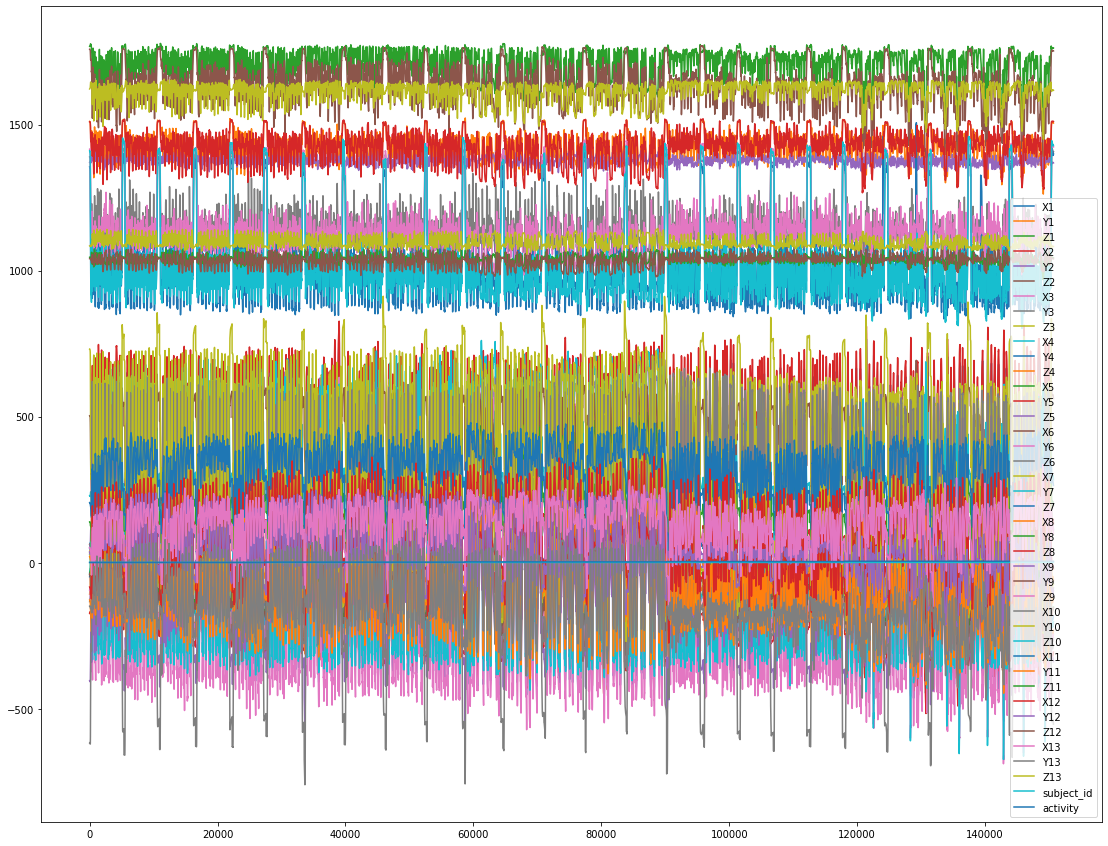

In [ ]:
df.plot()

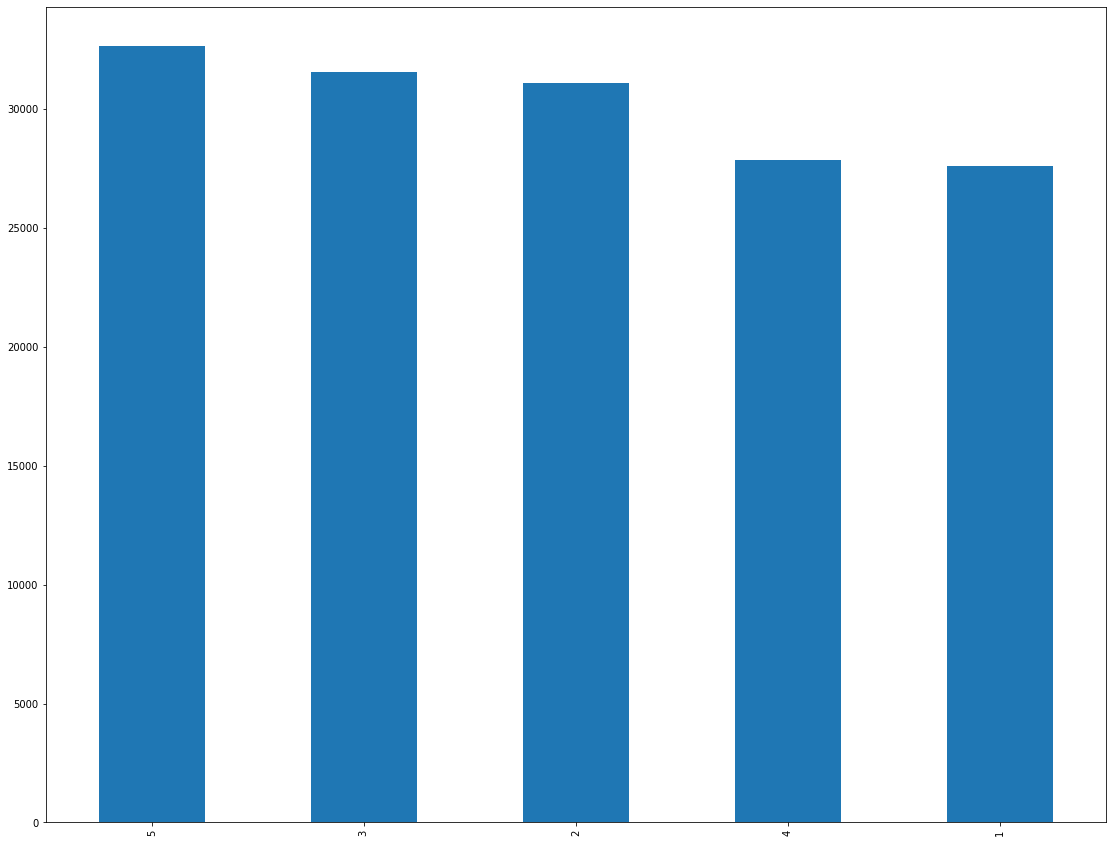

In [ ]:
df['activity'].value_counts().plot.bar()

# Pre-processing:
In the preprocessing stage we need to first focus on the missing values. Let's check if our data have any missing values.

In [ ]:
df.isnull().sum().sum()

843

In [ ]:
print(df.isnull().sum())

X1              0
Y1              0
Z1              0
X2              0
Y2              0
Z2              0
X3              0
Y3              0
Z3              0
X4            156
Y4            156
Z4            156
X5              0
Y5              0
Z5              0
X6              0
Y6              0
Z6              0
X7             17
Y7             17
Z7             17
X8              5
Y8              5
Z8              5
X9              0
Y9              0
Z9              0
X10             0
Y10             0
Z10             0
X11            21
Y11            21
Z11            21
X12            60
Y12            60
Z12            60
X13            22
Y13            22
Z13            22
subject_id      0
activity        0
dtype: int64


We have some missing values. So, we have to keep that in mind while handling the data. To work with this data we will devide the whole data into smaller segments.

In [6]:
def segmentation(x_data,overlap_rate,time_window):
    
    # make a list for segment window and its label
    seg_data = []
    y_segmented_list = []

    #convert overlap rate to step for sliding window
    overlap = int((1 - overlap_rate)*time_window)
    
    #segment and keep the labels
    for i in range(0,x_data.shape[0],overlap):
        seg_data.append(x_data[i:i+time_window])
        y_segmented_list.append(x_data['activity'][i])
        
    return seg_data,y_segmented_list

In [15]:

#Segmentation with overlaprate=0 & window=100
df1_itpl=df.interpolate()
#replace missing values with 0
df1_itpl=df1_itpl.fillna(0) 
[seg, seg_label]=segmentation(df1_itpl,0.5,350)
      

# Feature Extarction:
There are many types of features. For ease of use we have shown only some very common features.

In [8]:
def get_features(x_data):
    #Set features list
    features = []
    #Set columns name list
    DFclist=list(x_data.columns)

    #Calculate features (STD, Average, Max, Min) for each data columns X Y Z 
    for k in DFclist:
        # std
        features.append(x_data[k].std(ddof=0))
        # avg
        features.append(np.average(x_data[k]))
        # max
        features.append(np.max(x_data[k]))
        # min
        features.append(np.min(x_data[k]))
    return features

In [14]:
#set list
features_list=[]
label_list=[]
for j in range(0,len(seg)):
    #extract only xyz columns
            frame1=seg[j].drop(columns=['subject_id','activity'])
            

            #Get features and label for each elements
            features_list.append(get_features(frame1))
            label_list.append(seg_label[j])

Now we have a feature list and lablel list. Next step is classification.

# Training:

For classification there are several models. Here we are using one of the most commonly used model Random Forest.

In [10]:
from sklearn.ensemble import RandomForestClassifier         
model_ml = RandomForestClassifier(n_estimators=500,n_jobs=-1)

Here we only have one subject. So, we will divide data from this subject into train and test file to evaluate the results. For more than one subject you can also put one subject in testing and others in training.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_list, label_list, test_size=0.3, random_state=42)

Now let's train the model!

In [12]:
model_ml.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

The training is complete but how can we see the results? For that we will here use classification report with which we can see the accuracy, precision, recall and f1 score. We will also use confusion matrix for the evaluation.

              precision    recall  f1-score   support

           1       0.88      0.79      0.83        47
           2       0.87      0.84      0.85        56
           3       0.96      0.90      0.93        52
           4       0.87      0.85      0.86        48
           5       0.78      0.93      0.85        56

    accuracy                           0.86       259
   macro avg       0.87      0.86      0.87       259
weighted avg       0.87      0.86      0.87       259



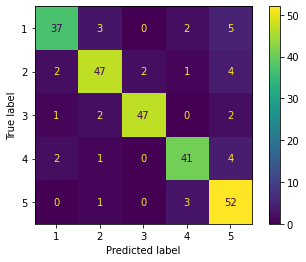

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

y_predict = model_ml.predict(X_test)
print(classification_report(y_test,y_predict))
#confusion_matrix(y_test, y_predict)
plot_confusion_matrix(model_ml, X_test, y_test)
plt.show()

We have successfully completed learning to read the data, visualize data, pre-processing, feature extraction, classification and evaluation of the generated model. Now it's your turn to generate a model following these steps and predict the labels of the test data. Best of luck!